# Atenção

Esse notebook não roda no windows, por conta da dependência `tensorflow-text`

A dependência em questão, não tem `wheels` disponíveis para o Windows.

Dito isso, para rodar esse notebook, podemos utilizar 
  - Linux -- WSL ou nativo
  - Google Colab

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_core as keras
import keras_nlp

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix

from src.utils import import_datasets, limpar_textos, plotar_matriz_confusao

2025-09-16 20:15:11.222640: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-16 20:15:11.223503: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-16 20:15:11.228098: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-16 20:15:11.239796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758064511.258158   17996 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758064511.26

Using TensorFlow backend


/home/marco/Área de trabalho/Trabalho-ML-Tweets/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_train, df_test = import_datasets()

# tratando os dados da coluna de textos
df_train["text_clean"] = df_train["text"].apply(limpar_textos)
df_test["text_clean"] = df_test["text"].apply(limpar_textos)

df_train[linhas, colunas] = (7613, 5)
Tammanho df_train = 0.29 MB
df_test[linhas, colunas] = (3263, 4)
Tamanho df_test = 0.10 MB


In [4]:
df_train.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive #wildfires evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [5]:
df_test.head()

,id,keyword,location,text,text_clean
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about #earthquake is different cities s...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting #spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan


In [6]:
BATCH_SIZE = 32
NUM_TRAINING_EXAMPLES = df_train.shape[0]
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2
STEPS_PER_EPOCH = int(NUM_TRAINING_EXAMPLES)*TRAIN_SPLIT // BATCH_SIZE

EPOCHS = 2
AUTO = tf.data.experimental.AUTOTUNE

In [7]:
X = df_train["text"]
y = df_train["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

X_test = df_test["text"]

In [8]:
preset= "distil_bert_base_en_uncased"

preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    preset,
    sequence_length=160,
    name="preprocessor_4_tweets"
)

classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    preset,
    preprocessor = preprocessor,
    num_classes=2
)

classifier.summary()

100%|██████████| 462/462 [00:00<00:00, 989kB/s]


100%|██████████| 794/794 [00:00<00:00, 2.24MB/s]


100%|██████████| 226k/226k [00:00<00:00, 437kB/s]
2025-09-16 20:15:22.843219: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


100%|██████████| 253M/253M [00:57<00:00, 4.59MB/s] 


Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics= ["accuracy"]
)

# Fit
history = classifier.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val)
)

Epoch 1/2


2025-09-16 20:16:24.311741: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT64 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


191/191 ━━━━━━━━━━━━━━━━━━━━ 1485s 8s/step - accuracy: 0.5504 - loss: 0.7008 - val_accuracy: 0.5739 - val_loss: 0.6846
Epoch 2/2
191/191 ━━━━━━━━━━━━━━━━━━━━ 2707s 14s/step - accuracy: 0.5695 - loss: 0.6859 - val_accuracy: 0.5739 - val_loss: 0.6832


In [10]:
y_pred_probs = classifier.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)

48/48 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step


In [11]:
print("F1 (macro):", f1_score(y_val, y_pred, average="macro"))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Recall (macro):", recall_score(y_val, y_pred, average="macro"))

F1 (macro): 0.3646224447225699
Accuracy: 0.5738673670387393
Recall (macro): 0.5


In [12]:
submission_bert = pd.DataFrame({"id": df_test["id"], "target": np.argmax(classifier.predict(X_test), axis=1)})
submission_bert.to_csv("resultados/submission_bert.csv", index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step


# Gerando gráficos

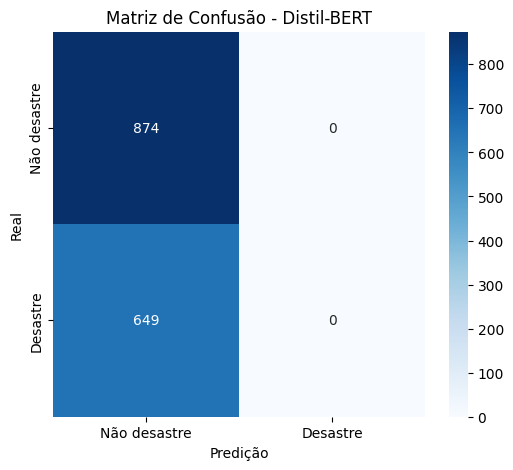

In [13]:
cm = confusion_matrix(y_val, y_pred)

plotar_matriz_confusao(cm, "Distil-BERT")

48/48 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step


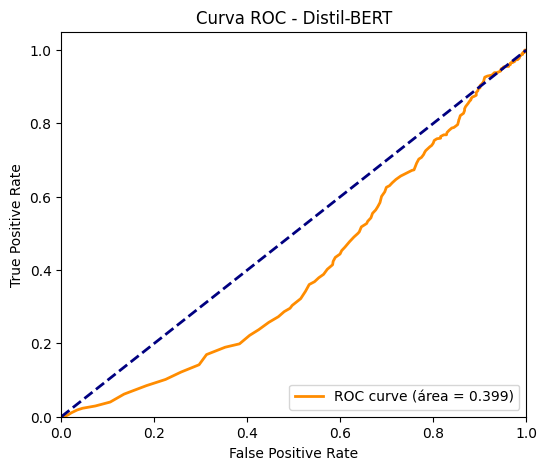

In [14]:
probs = classifier.predict(X_val)[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, probs)
auc = roc_auc_score(y_val, probs)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (área = {auc:.3f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Distil-BERT")
plt.legend(loc="lower right")
plt.show()


48/48 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step


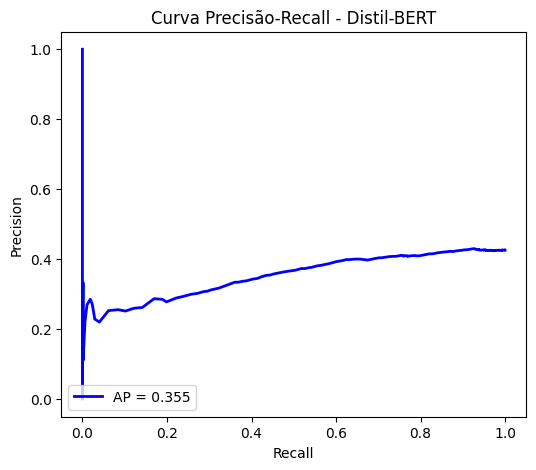

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score

probs = classifier.predict(X_val)[:, 1]

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_val, probs)
ap = average_precision_score(y_val, probs)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color="blue", lw=2, label=f"AP = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisão-Recall - Distil-BERT")
plt.legend(loc="lower left")
plt.show()